# Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
from gensim.models import Word2Vec 
from nltk.stem import WordNetLemmatizer 

In [4]:
import warnings   
warnings.filterwarnings(action = 'ignore') 

# Data

In [5]:
data = pd.read_csv('TripAdvisor.csv')

In [6]:
data.head()

,Rating,Review
0,3,"2/3 STAR CATOGORY, VALUE FOR MONEY IF YOU GET ..."
1,4,"Good ambience, decent crowd, good food and ser..."
2,1,If you want to weekend at this place don’t ste...
3,4,The hotel is located middle of the highway. Th...
4,4,We went here for a wedding function. The rooms...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673 entries, 0 to 1672
Data columns (total 2 columns):
Rating    1673 non-null int64
Review    1673 non-null object
dtypes: int64(1), object(1)
memory usage: 26.2+ KB


In [8]:
def sentiment(x):
    if x < 3:
        return 1 #negative
    else:
        return 0 #positive
data['Sentiment'] = data['Rating'].apply(sentiment)

In [9]:
data.head()

,Rating,Review,Sentiment
0,3,"2/3 STAR CATOGORY, VALUE FOR MONEY IF YOU GET ...",0
1,4,"Good ambience, decent crowd, good food and ser...",0
2,1,If you want to weekend at this place don’t ste...,1
3,4,The hotel is located middle of the highway. Th...,0
4,4,We went here for a wedding function. The rooms...,0


In [10]:
data.describe()

,Rating,Sentiment
count,1673.000000,1673.000000
mean,3.153616,0.292289
std,1.304097,0.454951
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,1.000000
max,5.000000,1.000000


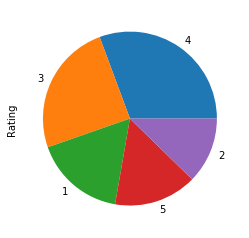

In [11]:
data['Rating'].value_counts().plot.pie()

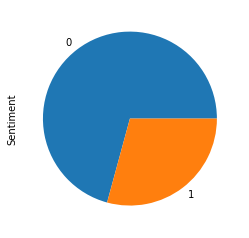

In [12]:
data['Sentiment'].value_counts().plot.pie()

**Stopwords**



In [13]:
with open('stopwords.txt') as f:
    stopwords = f.readlines()

In [14]:
stopwords = (set(map(lambda x: x.strip(), stopwords))|set(['.', 'hotel', 'room', 'i']))-set(['neither', 
    'no', 'not', 'nor', 'none', 'never'])

In [15]:
print(list(sorted(stopwords)), len(stopwords))

['.', 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'aren', "aren't", 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldn', "couldn't", 'couldnt', 'cry', 'd', 'de', 'describe', 'detail', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify'

# Analysis
* Remove puntuation
* Remove numbers
* Remove Extra White Spaces
* Word tokenize
* Lower Case
* Stopwords removal
* Lemmatize

In [16]:
def remove_stop_words__lemmatize(X):
    features = []
    for x in X:
        if x.lower() not in stopwords:
            features.append(x.lower())
    return features

In [17]:
data['Review'] = data['Review'].apply(lambda x : re.sub(r'\.', ' . ', x))
data['Review'] = data['Review'].apply(lambda x : re.sub(r'\s+', ' ', x))

In [18]:
reviews = data['Review'].apply(lambda x : re.sub(r'\W', ' ', x))
reviews = reviews.apply(lambda x : re.sub(r'\d', ' ', x))
reviews = reviews.apply(lambda x : re.sub(r'\.', ' . ', x))
reviews = reviews.apply(lambda x : re.sub(r'\s+', ' ', x))
reviews = reviews.apply(lambda x : x.strip())
reviews = reviews.apply(lambda x : ' '.join(remove_stop_words__lemmatize(word_tokenize(x.lower()))))

In [19]:
pd.concat([pd.DataFrame(reviews), data['Sentiment']], axis=1).to_csv('review_clean.csv', index=False)

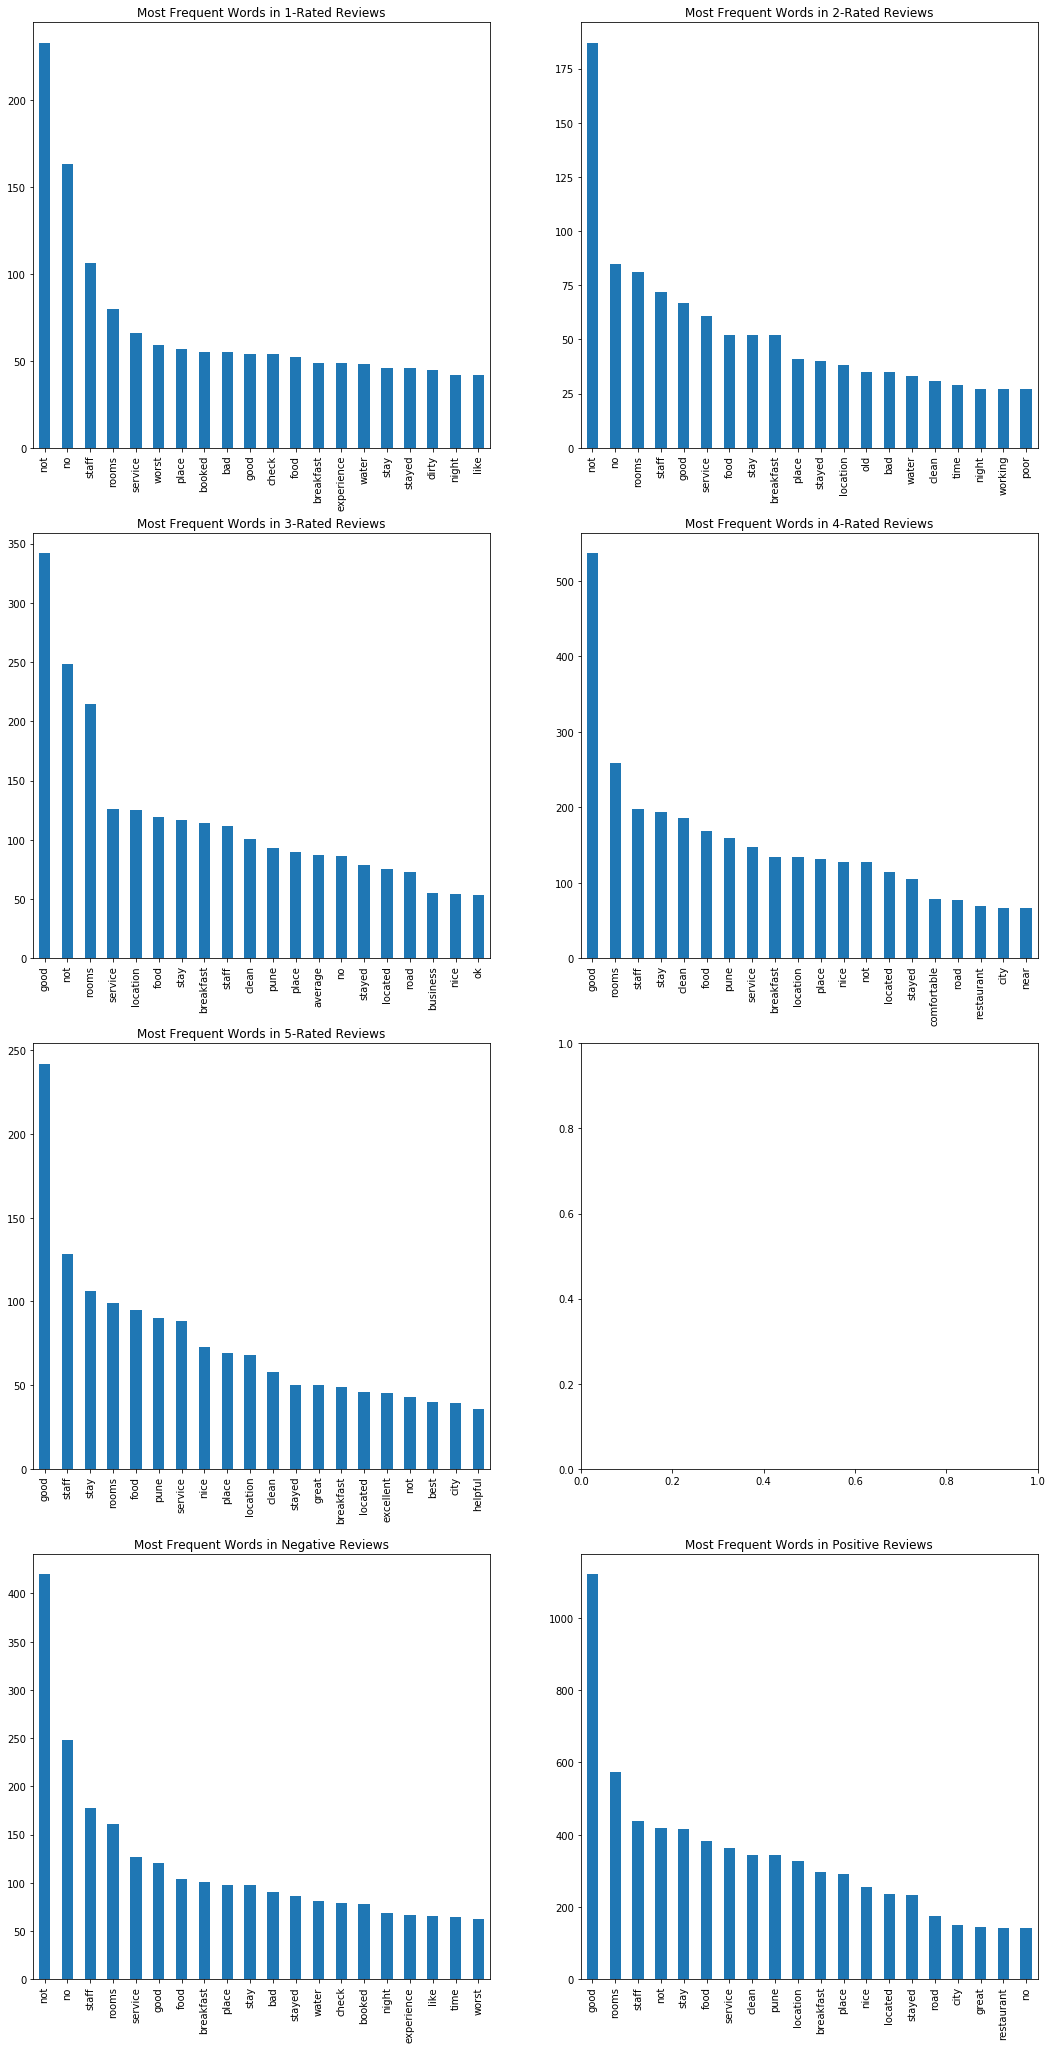

In [20]:
fig, ax = plt.subplots(figsize=(18,36), nrows=4, ncols=2)

pd.Series(' '.join(reviews[data['Rating']==1]).lower().split()).value_counts()[:20].plot.bar(ax =ax[0][0])
ax[0][0].set_title('Most Frequent Words in 1-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==2]).lower().split()).value_counts()[:20].plot.bar(ax =ax[0][1])
ax[0][1].set_title('Most Frequent Words in 2-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==3]).lower().split()).value_counts()[:20].plot.bar(ax =ax[1][0])
ax[1][0].set_title('Most Frequent Words in 3-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==4]).lower().split()).value_counts()[:20].plot.bar(ax =ax[1][1])
ax[1][1].set_title('Most Frequent Words in 4-Rated Reviews')

pd.Series(' '.join(reviews[data['Rating']==5]).lower().split()).value_counts()[:20].plot.bar(ax =ax[2][0])
ax[2][0].set_title('Most Frequent Words in 5-Rated Reviews')


pd.Series(' '.join(reviews[data['Sentiment']==1]).lower().split()).value_counts()[:20].plot.bar(ax =ax[3][0])
ax[3][0].set_title('Most Frequent Words in Negative Reviews')

pd.Series(' '.join(reviews[data['Sentiment']==0]).lower().split()).value_counts()[:20].plot.bar(ax =ax[3][1])
ax[3][1].set_title('Most Frequent Words in Positive Reviews')


plt.show()

# Keywords Extraction and Summarization

In [21]:
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from fuzzywuzzy import fuzz
from scipy.sparse import coo_matrix

In [22]:
def reduce_pos(x):
    tags = pos_tag(word_tokenize(x.lower()))
    words = []
    for t in tags:
        if t[1] in ['FW', 'JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'RB', 'RBR', 'RBS']:
            words.append(t[0])
    return ' '.join(words)

def indices_for_rating(rating):
    indices = []
    for i in range(len(reviews)):
        if data.iloc[i]['Rating']==rating:
            indices.append(i)
    return indices

def check_duplicacy(keyword, results):
    fuzz_sim = 0
    for k in results:
        fuzz_sim = max(fuzz.token_set_ratio(k, keyword), fuzz_sim)
    return 1 if fuzz_sim >= 80 else 0

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=3):
    score_vals = []
    feature_vals = []
    
    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
        
    results= []
    for idx in range(len(feature_vals)):
        if check_duplicacy(feature_vals[idx], results) == 0:
            results.append(feature_vals[idx])
        if len(results) == topn:
            break
    
    return results

def extract_keywords(index, k, vectorizer):
    feature_names=vectorizer.get_feature_names()
    doc=reviews[index]
    tf_idf_vector=vectorizer.transform([doc])
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,k)
    return keywords

flatten = lambda l: [item for sublist in l for item in sublist]

In [23]:
def relations(tags, kws):
    insights = []
    for i in range(len(tags)):
        if tags[i][0] in kws and tags[i][1] in ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'RB', 'RBR', 'RBS']:
            if tags[i][1] in ['JJ', 'JJR', 'JJS']:
                # Adjective -> search for nearest noun (after)
                # after
                j = i
                while j < len(tags):
                    if tags[j][1] in ['NN', 'NNS', 'NNP', 'NNPS'] and re.match(r'\w+', tags[j][0]):
                        insights.append(tags[i][0]+' '+tags[j][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j += 1
                # before
                j = i
                while j > 0:
                    if tags[j][1] in ['NN', 'NNS', 'NNP', 'NNPS'] and re.match(r'\w+', tags[j][0]):
                        insights.append(tags[j][0]+' '+tags[i][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j -= 1
            elif tags[i][1] in ['RB', 'RBR', 'RBS']:
                # Adjverb -> search for nearest verb (before)
                 # after
                j = i
                while j < len(tags):
                    if tags[j][1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] and re.match(r'\w+', tags[j][0]):
                        insights.append(tags[i][0]+' '+tags[j][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j += 1
                # before
                j = i
                while j > 0:
                    if tags[j][1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'] and re.match(r'\w+', tags[j][0]):
                        insights.append(tags[j][0]+' '+tags[i][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j -= 1
            else:
                # noun -> search for nearest adjective (before)
                # after
                j = i
                while j < len(tags):
                    if tags[j][1] in ['JJ', 'JJR', 'JJS'] and re.match(r'\w+', tags[j][0]):
                        insights.append(tags[i][0]+' '+tags[j][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j += 1
                # before
                j = i
                while j > 0:
                    if tags[j][1] in ['JJ', 'JJR', 'JJS'] and re.match(r'\w+', tags[j][0]):
                        insights.append(tags[j][0]+' '+tags[i][0])
                        break
                    if tags[j][0] == '.':
                        break
                    j -= 1
    return insights

In [24]:
domain_specific_stopwords = ['experience', 'pune', 'road', 'i', 'point', 'booked', 'same', 'was']

In [25]:
reduced_reviews = reviews.apply(reduce_pos)

In [26]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(reduced_reviews)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

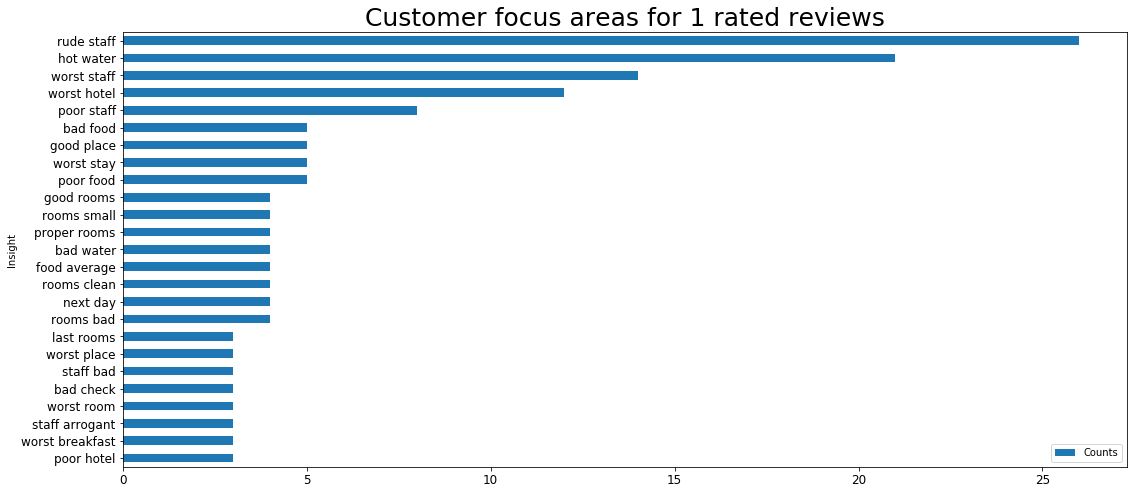

In [27]:
query = 1

keywords = []
for i in indices_for_rating(query):
    keywords += extract_keywords(i, 3, vectorizer)

kws = flatten(list(map(lambda x : x.split(), keywords)))
kws= pd.Series(kws).value_counts().index.tolist()
kws = [k for k in kws if k not in ['neither', 'no', 'not', 'nor', 'none', 'never']]
kws = kws[:25]

insights = []
for i in indices_for_rating(query):
    tags = pos_tag(word_tokenize(data['Review'][i].lower()))
    insights += relations(tags, kws)

insights = pd.DataFrame(pd.Series(insights).value_counts())
insights.reset_index(inplace=True)
insights.columns = ['Insight', 'Counts']

rows2drop = []
for i in range(len(insights)):
    for j in range(i+1, len(insights)):
        if fuzz.token_set_ratio(insights['Insight'][i], insights['Insight'][j]) == 100:
            insights['Counts'][i] += insights['Counts'][j]
            rows2drop.append(j)
    for sw in domain_specific_stopwords:
        if sw in insights['Insight'][i]:
            rows2drop.append(i)
            break
insights.drop(rows2drop, inplace=True)
insights.sort_values(by='Counts', inplace=True, ascending=False)
insights.reset_index(drop=True, inplace=True)

ax = insights.iloc[::-1].tail(25).plot.barh(x='Insight', y='Counts', figsize=(18,8),fontsize=12, title=f'Customer focus areas for {query} rated reviews')
ax.title.set_size(25)

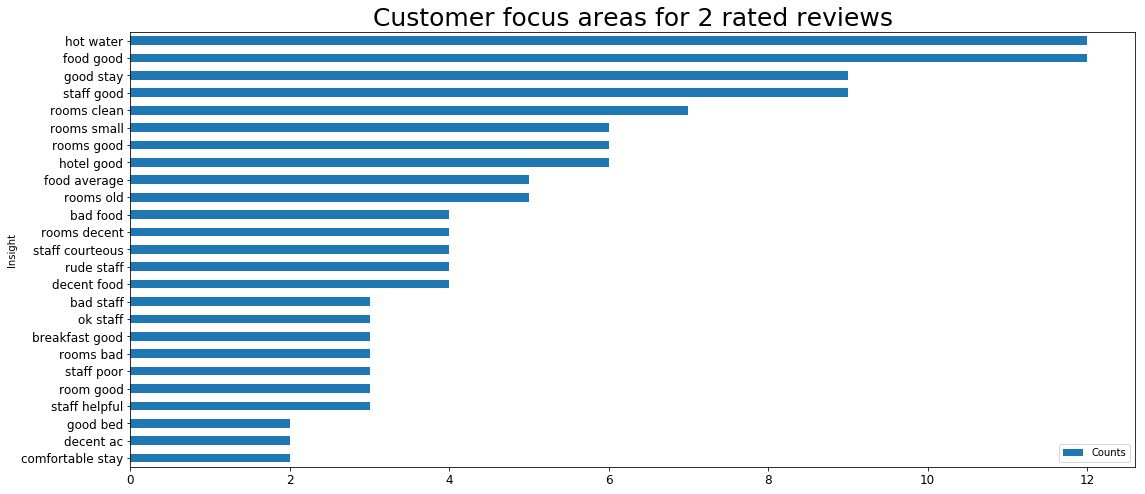

In [28]:
query = 2

keywords = []
for i in indices_for_rating(query):
    keywords += extract_keywords(i, 3, vectorizer)

kws = flatten(list(map(lambda x : x.split(), keywords)))
kws= pd.Series(kws).value_counts().index.tolist()
kws = [k for k in kws if k not in ['neither', 'no', 'not', 'nor', 'none', 'never']]
kws = kws[:25]

insights = []
for i in indices_for_rating(query):
    tags = pos_tag(word_tokenize(data['Review'][i].lower()))
    insights += relations(tags, kws)

insights = pd.DataFrame(pd.Series(insights).value_counts())
insights.reset_index(inplace=True)
insights.columns = ['Insight', 'Counts']

rows2drop = []
for i in range(len(insights)):
    for j in range(i+1, len(insights)):
        if fuzz.token_set_ratio(insights['Insight'][i], insights['Insight'][j]) == 100:
            insights['Counts'][i] += insights['Counts'][j]
            rows2drop.append(j)
    for sw in domain_specific_stopwords:
        if sw in insights['Insight'][i]:
            rows2drop.append(i)
            break
insights.drop(rows2drop, inplace=True)
insights.sort_values(by='Counts', inplace=True, ascending=False)
insights.reset_index(drop=True, inplace=True)

ax = insights.iloc[::-1].tail(25).plot.barh(x='Insight', y='Counts', figsize=(18,8),fontsize=12, title=f'Customer focus areas for {query} rated reviews')
ax.title.set_size(25)

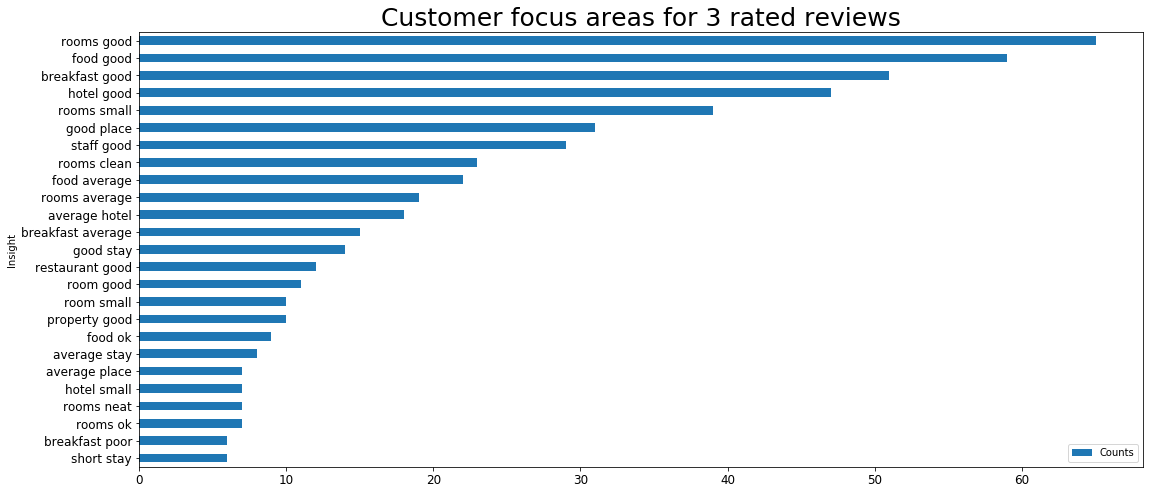

In [29]:
query = 3

keywords = []
for i in indices_for_rating(query):
    keywords += extract_keywords(i, 3, vectorizer)

kws = flatten(list(map(lambda x : x.split(), keywords)))
kws= pd.Series(kws).value_counts().index.tolist()
kws = [k for k in kws if k not in ['neither', 'no', 'not', 'nor', 'none', 'never']]
kws = kws[:25]

insights = []
for i in indices_for_rating(query):
    tags = pos_tag(word_tokenize(data['Review'][i].lower()))
    insights += relations(tags, kws)

insights = pd.DataFrame(pd.Series(insights).value_counts())
insights.reset_index(inplace=True)
insights.columns = ['Insight', 'Counts']

rows2drop = []
for i in range(len(insights)):
    for j in range(i+1, len(insights)):
        if fuzz.token_set_ratio(insights['Insight'][i], insights['Insight'][j]) == 100:
            insights['Counts'][i] += insights['Counts'][j]
            rows2drop.append(j)
    for sw in domain_specific_stopwords:
        if sw in insights['Insight'][i]:
            rows2drop.append(i)
            break
insights.drop(rows2drop, inplace=True)
insights.sort_values(by='Counts', inplace=True, ascending=False)
insights.reset_index(drop=True, inplace=True)

ax = insights.iloc[::-1].tail(25).plot.barh(x='Insight', y='Counts', figsize=(18,8),fontsize=12, title=f'Customer focus areas for {query} rated reviews')
ax.title.set_size(25)

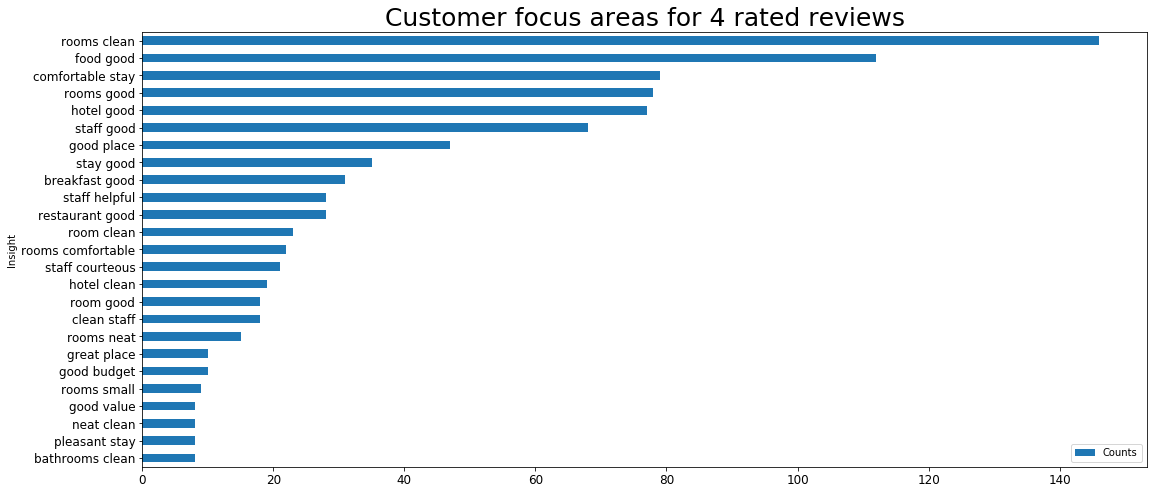

In [30]:
query = 4

keywords = []
for i in indices_for_rating(query):
    keywords += extract_keywords(i, 3, vectorizer)

kws = flatten(list(map(lambda x : x.split(), keywords)))
kws= pd.Series(kws).value_counts().index.tolist()
kws = [k for k in kws if k not in ['neither', 'no', 'not', 'nor', 'none', 'never']]
kws = kws[:25]

insights = []
for i in indices_for_rating(query):
    tags = pos_tag(word_tokenize(data['Review'][i].lower()))
    insights += relations(tags, kws)

insights = pd.DataFrame(pd.Series(insights).value_counts())
insights.reset_index(inplace=True)
insights.columns = ['Insight', 'Counts']

rows2drop = []
for i in range(len(insights)):
    for j in range(i+1, len(insights)):
        if fuzz.token_set_ratio(insights['Insight'][i], insights['Insight'][j]) == 100:
            insights['Counts'][i] += insights['Counts'][j]
            rows2drop.append(j)
    for sw in domain_specific_stopwords:
        if sw in insights['Insight'][i]:
            rows2drop.append(i)
            break
insights.drop(rows2drop, inplace=True)
insights.sort_values(by='Counts', inplace=True, ascending=False)
insights.reset_index(drop=True, inplace=True)

ax = insights.iloc[::-1].tail(25).plot.barh(x='Insight', y='Counts', figsize=(18,8),fontsize=12, title=f'Customer focus areas for {query} rated reviews')
ax.title.set_size(25)

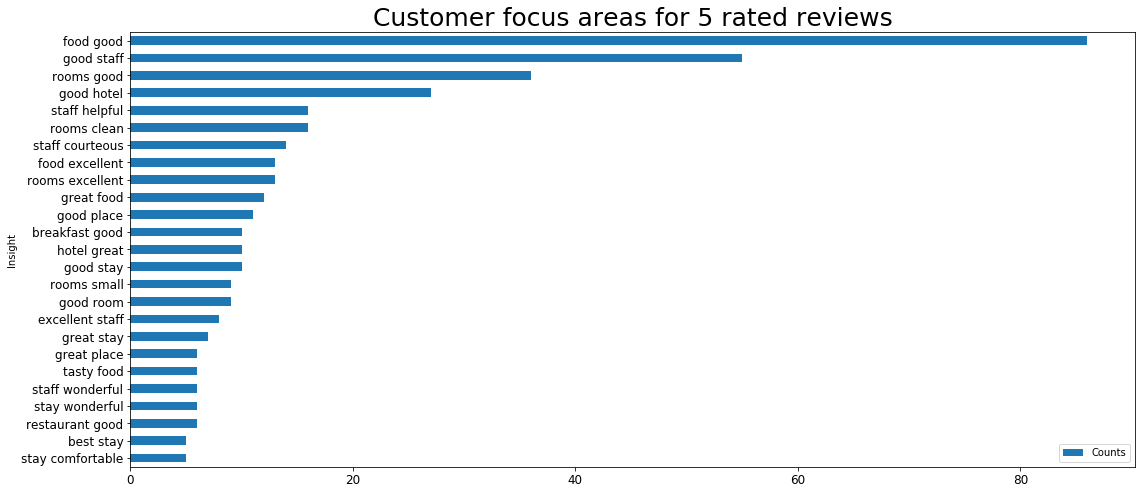

In [31]:
query = 5

keywords = []
for i in indices_for_rating(query):
    keywords += extract_keywords(i, 3, vectorizer)

kws = flatten(list(map(lambda x : x.split(), keywords)))
kws= pd.Series(kws).value_counts().index.tolist()
kws = [k for k in kws if k not in ['neither', 'no', 'not', 'nor', 'none', 'never']]
kws = kws[:25]

insights = []
for i in indices_for_rating(query):
    tags = pos_tag(word_tokenize(data['Review'][i].lower()))
    insights += relations(tags, kws)

insights = pd.DataFrame(pd.Series(insights).value_counts())
insights.reset_index(inplace=True)
insights.columns = ['Insight', 'Counts']

rows2drop = []
for i in range(len(insights)):
    for j in range(i+1, len(insights)):
        if fuzz.token_set_ratio(insights['Insight'][i], insights['Insight'][j]) == 100:
            insights['Counts'][i] += insights['Counts'][j]
            rows2drop.append(j)
    for sw in domain_specific_stopwords:
        if sw in insights['Insight'][i]:
            rows2drop.append(i)
            break
insights.drop(rows2drop, inplace=True)
insights.sort_values(by='Counts', inplace=True, ascending=False)
insights.reset_index(drop=True, inplace=True)

ax = insights.iloc[::-1].tail(25).plot.barh(x='Insight', y='Counts', figsize=(18,8),fontsize=12, title=f'Customer focus areas for {query} rated reviews')
ax.title.set_size(25)